In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_csv = "iris.csv"  
iris_data = pd.read_csv(file_path_csv)

In [3]:
X = iris_data.drop("species", axis=1)
y = iris_data["species"]

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y = y.map(label_mapping)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

In [23]:
catboost_model = CatBoostClassifier(iterations=100, depth=3, learning_rate=0.3, loss_function='MultiClass')
catboost_model.fit(train_pool, eval_set=test_pool, verbose=10)

0:	learn: 0.7163559	test: 0.6939108	best: 0.6939108 (0)	total: 1.08ms	remaining: 107ms
10:	learn: 0.1653186	test: 0.1182036	best: 0.1182036 (10)	total: 17.3ms	remaining: 140ms
20:	learn: 0.1008251	test: 0.0545304	best: 0.0545304 (20)	total: 31.8ms	remaining: 120ms
30:	learn: 0.0731056	test: 0.0365000	best: 0.0365000 (30)	total: 49.8ms	remaining: 111ms
40:	learn: 0.0551652	test: 0.0279415	best: 0.0279415 (40)	total: 56.9ms	remaining: 81.9ms
50:	learn: 0.0415991	test: 0.0249912	best: 0.0249912 (50)	total: 63.4ms	remaining: 61ms
60:	learn: 0.0369166	test: 0.0225403	best: 0.0225403 (60)	total: 72.7ms	remaining: 46.5ms
70:	learn: 0.0314849	test: 0.0196257	best: 0.0196257 (70)	total: 79.8ms	remaining: 32.6ms
80:	learn: 0.0282172	test: 0.0173352	best: 0.0173352 (80)	total: 84.6ms	remaining: 19.8ms
90:	learn: 0.0254519	test: 0.0155645	best: 0.0155645 (90)	total: 92ms	remaining: 9.09ms
99:	learn: 0.0231959	test: 0.0147463	best: 0.0147463 (99)	total: 97.1ms	remaining: 0us

bestTest = 0.014746271

In [12]:
y_pred = catboost_model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)

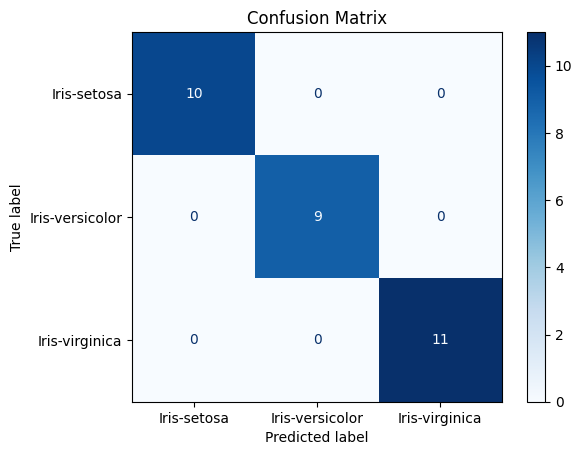

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_mapping.keys())
disp.plot(cmap="Blues", values_format="d")
plt.title('Confusion Matrix')
plt.show()

In [21]:
y_test_bin = label_binarize(y_test, classes=list(label_mapping.values()))
y_pred_prob = catboost_model.predict_proba(X_test)

C:\Users\kevin\Desktop\IntelligentSystem\IEVenv\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\kevin\Desktop\IntelligentSystem\IEVenv\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\kevin\Desktop\IntelligentSystem\IEVenv\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


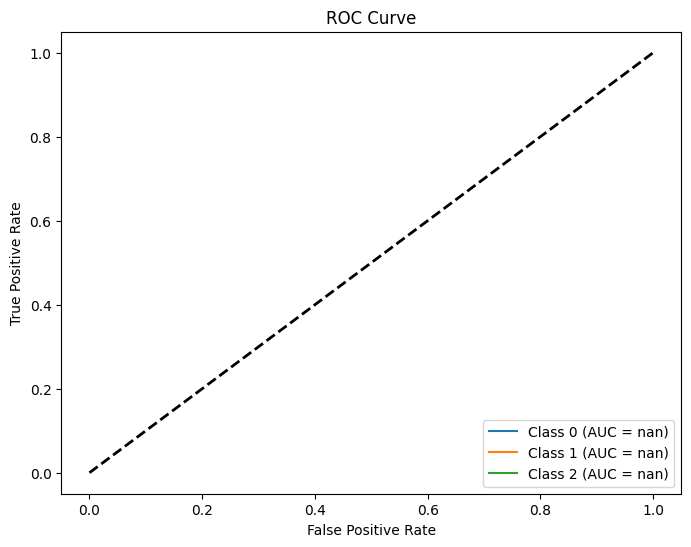

In [22]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(catboost_model.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

for i in range(catboost_model.classes_.shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
classification_rep_catboost = classification_report (y_test, y_pred)

In [25]:
print("Classification Report:")
print(classification_rep_catboost)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

